In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler


# Load Data 

In [2]:
boston = load_boston()

In [3]:
# create X fetures and Y target as data frame 
x = boston.data
y = boston.target

In [4]:
# make data frame 
data = pd.DataFrame(x,columns=boston.feature_names)
data['Saleprice'] = y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Saleprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  Saleprice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


## from the result above we notice we don't have any null value 

In [7]:
# shape of data 
print(data.shape)

(506, 14)


In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Saleprice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Show Data

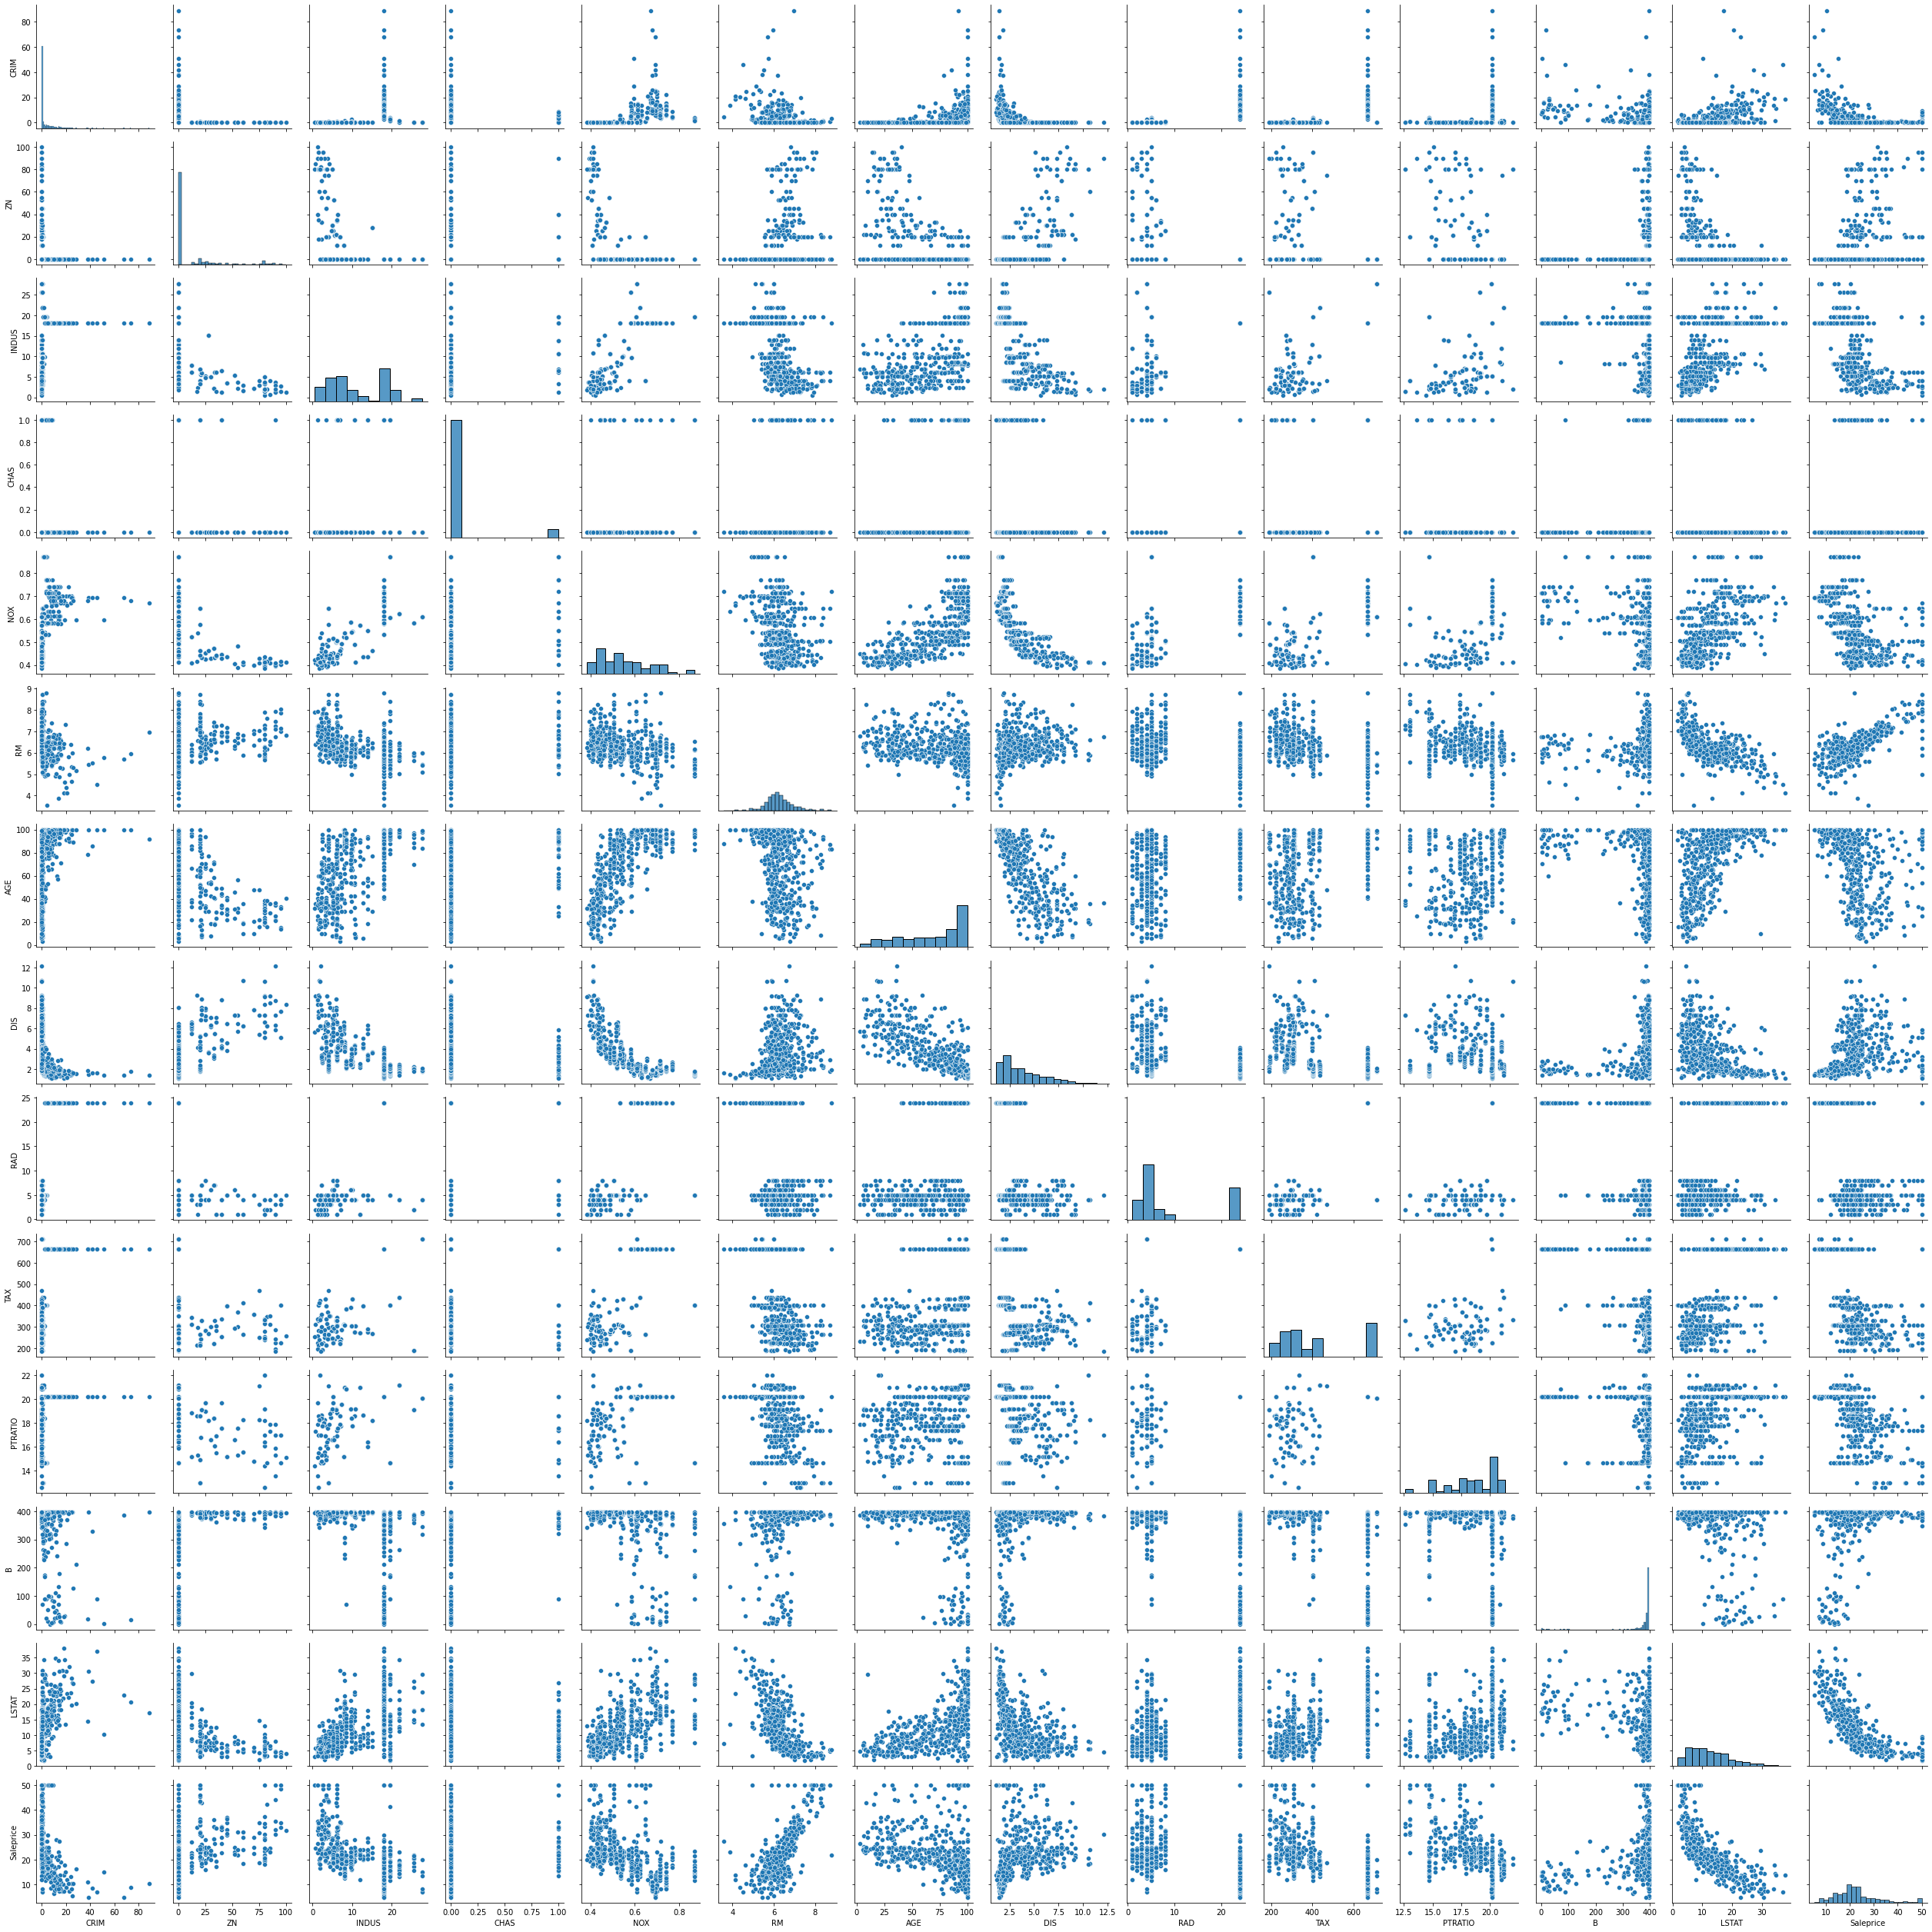

In [21]:
sns.pairplot(data )
plt.tight_layout()

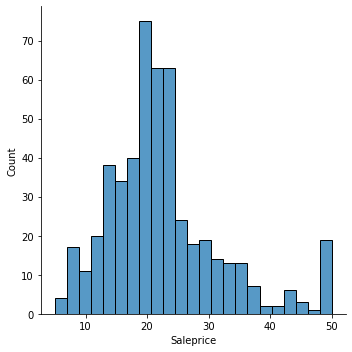

In [22]:
sns.displot(data['Saleprice'])

In [23]:
print('skewness: %f' %data['Saleprice'].skew())
print('kurtosis" %f' % data['Saleprice'].kurt())

skewness: 1.108098
kurtosis" 1.495197


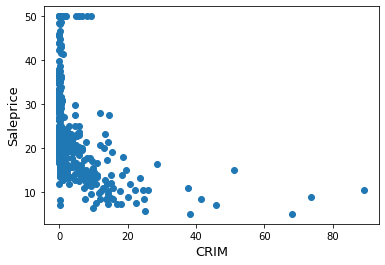

In [26]:
fig ,ax =plt.subplots()
ax.scatter(data['CRIM'],data['Saleprice'])
plt.xlabel('CRIM',fontsize=13)
plt.ylabel('Saleprice',fontsize=13)
plt.show()

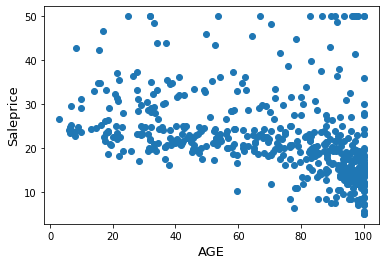

In [27]:
fig ,ax =plt.subplots()
ax.scatter(data['AGE'],data['Saleprice'])
plt.xlabel('AGE',fontsize=13)
plt.ylabel('Saleprice',fontsize=13)
plt.show()

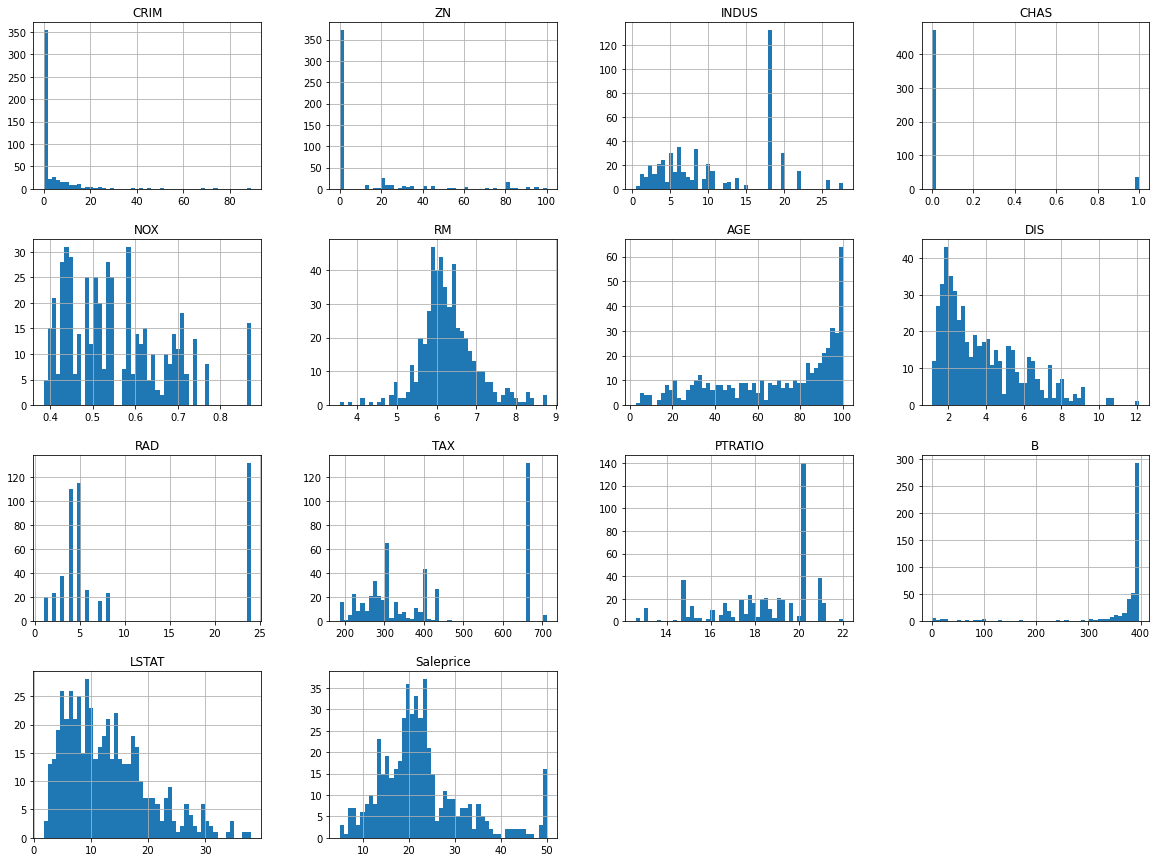

In [30]:
data.hist(bins=50 , figsize=(20,15))
plt.show()

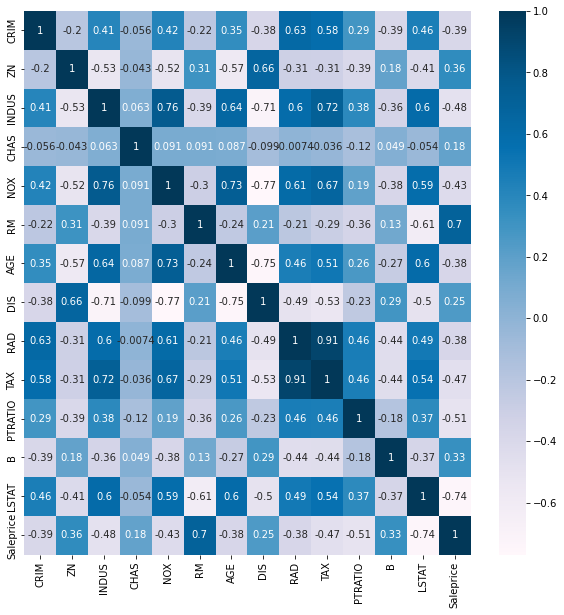

In [33]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor,annot=True ,cmap =plt.cm.PuBu)
plt.show()

# Bulid Model 

In [35]:
x = data.drop('Saleprice' ,axis=1)
y = data['Saleprice']


In [36]:
# divied data to train set and test set 
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2 ,random_state=42)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


In [39]:
# create our model 
lr = LinearRegression()

In [40]:
# fit train set 
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
lr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [42]:
# make predict 
y_pred = lr.predict(x_test)


In [43]:
print("actual vaue for ", y_test[0])
print('predict value' , y_pred[0])

actual vaue for  24.0
predict value 28.99672361982493


In [49]:
# accurate our model 
print('Training set score {:.3f}'.format(lr.score(x_train,y_train)))

Training set score 0.751


In [50]:
print('Test set score {:.3f}'.format(lr.score(x_test,y_test)))

Test set score 0.669


# optimization model

In [53]:
# scaler data 
scaler =StandardScaler()

In [60]:
scaler.fit(x_train)

StandardScaler()

In [61]:
x_train_scaler = scaler.transform(x_train)

In [62]:
scaler.fit(x_test)

StandardScaler()

In [63]:
x_test_scaler = scaler.transform(x_test)

In [64]:
lr_scaler = LinearRegression()

In [65]:
lr_scaler.fit(x_train_scaler,y_train)

LinearRegression()

In [66]:
# accuracy 
print('Training set score {:.3f}'.format(lr_scaler.score(x_train_scaler,y_train)))

Training set score 0.751


In [67]:
print('Test set score {:.3f}'.format(lr_scaler.score(x_test_scaler,y_test)))

Test set score 0.626


In [86]:
print('Test set score {:.3f}'.format(lr_scaler_m.score(x_test_scalerM,y_test)))

Test set score 0.669
